<a href="https://colab.research.google.com/github/HackthValley/MachineLearningModel/blob/main/Alzheimer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Do remeber to see the course provided CNN folder for better comments and understanding

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = "/content/drive/My Drive/alzheimer_classification"

In [ ]:
os.listdir(data_dir)

['testing', 'training', 'new_model.h5']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [ ]:
from matplotlib.image import imread

In [ ]:
test_path = data_dir + '/testing/'
train_path = data_dir + '/training/'

In [ ]:
test_path

'/content/drive/My Drive/alzheimer_classification/testing/'

In [ ]:
os.listdir(test_path)

['healthy', 'unhealthy']

In [114]:
os.listdir(train_path+'healthy')

['healthy_24.jpeg',
 'healthy_05.jpeg',
 'healthy_19.jpeg',
 'healthy_21.jpeg',
 'healthy_18.jpeg',
 'healthy_35.jpeg',
 'healthy_22.jpeg',
 'healthy_31.jpeg',
 'healthy_33.jpeg',
 'healthy_01.png',
 'healthy_03.png',
 'healthy_20.png',
 'healthy_16.png',
 'healthy_12.png',
 'healthy_09.png',
 'healthy_13.png',
 'healthy_14.png',
 'healthy_15.png',
 'healthy_04.png',
 'healthy_05.png',
 'healthy_32.png',
 'healthy_23.png',
 'healthy_28.png',
 'healthy_27.png',
 'healthy_34.png',
 'healthy_36.png',
 'healthy_25.png',
 'healthy_26.png',
 'healthy_30.png',
 'healthy_29.png',
 'healthy_17.png',
 'healthy_08.jpg',
 'healthy_02.jpg',
 'healthy_11.jpg',
 'healthy_07.jpg',
 'healthy_06.jpg']

In [117]:
para_cell = train_path+'/healthy/'+'healthy_07.jpg'
para_cell

'/content/drive/My Drive/alzheimer_classification/training//healthy/healthy_07.jpg'

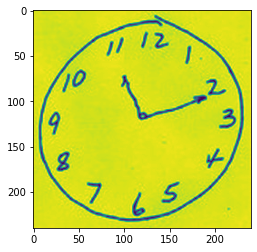

In [118]:
plt.imshow(imread(para_cell))

Real life images may not be all of same size. So lets make them of same size

In [ ]:
dim1 = []
dim2 = []
i = 0
for image_filename in os.listdir(test_path + 'healthy'):
  if(i != 0):
    img = imread(test_path + '/healthy/' + image_filename)
    # print(img.shape)
    d1, d2,color = img.shape
    dim1.append(d1)
    dim2.append(d2)
  i = i + 1

In [ ]:
dim1 

[240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240]

In [ ]:
dim2

[240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240]

In [ ]:
np.mean(dim1)

240.0

In [ ]:
np.mean(dim2) 

240.0

In [ ]:
image_shape = (240, 240, 3)

Now we'll later use this image_size to reshape our image. Now lets focus on improving our image, like flipping it, rotating it so that a model is able to understand a 'cell' in a better way

In [ ]:
130*130*3

50700

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
imread(para_cell).max()

255

In [ ]:
# Choose carefully here we have  acell thus makes sense to use rotation, wont make sense if we had to detect a face
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,                             
                               shear_range = 0.1,
                               zoom_range = 0.1,
                               horizontal_flip = True,
                               fill_mode = 'nearest'
                               ) # rescale = 1/255, but in our case it already b/w 0-1

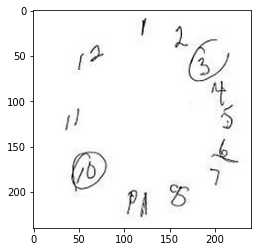

In [ ]:
para_image = imread(para_cell)
plt.imshow(para_image)

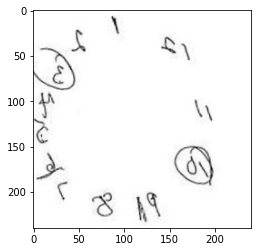

In [ ]:
# Modified image
plt.imshow(image_gen.random_transform(para_image))

In [ ]:
image_gen.flow_from_directory(train_path)

Found 72 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 33 images belonging to 2 classes.


In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Dropout, Flatten

In [79]:
model = Sequential()

# 1 
model.add(Conv2D(filters=16, kernel_size=(3, 3), 
                 input_shape = image_shape, # Resize all image to same size
                 activation = 'relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

# 2
model.add(Conv2D(filters=32, kernel_size=(3, 3), 
                 input_shape = image_shape, # Resize all image to same size
                 activation = 'relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

# 3
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 input_shape = image_shape, # Resize all image to same size
                 activation = 'relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

# 4
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 input_shape = image_shape, # Resize all image to same size
                 activation = 'relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

# 5
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 input_shape = image_shape, # Resize all image to same size
                 activation = 'relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')


In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 238, 238, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 119, 119, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 117, 117, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 58, 58, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 64)       

In [82]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 20)

As our data is too large and image size is also too large we create batches

In [83]:
batch_size = 32


In [84]:
train_image_gen =  image_gen.flow_from_directory(train_path,
                                                 target_size = image_shape[:2],
                                                 color_mode= 'rgb',
                                                 batch_size = batch_size,
                                                 class_mode = 'binary') # casue binary classification

Found 72 images belonging to 2 classes.


In [85]:
test_image_gen =  image_gen.flow_from_directory(test_path,
                                                 target_size = image_shape[:2],
                                                 color_mode= 'rgb',
                                                 batch_size = batch_size,
                                                 class_mode = 'binary',
                                                shuffle = False)


Found 33 images belonging to 2 classes.


In [86]:
train_image_gen.class_indices

{'healthy': 0, 'unhealthy': 1}

In [87]:
results = model.fit(train_image_gen, epochs = 200, 
                              validation_data = test_image_gen,callbacks=[early_stop])

Epoch 1/200
3/3 [==============================] - 3s 1s/step - loss: 92.1194 - accuracy: 0.4722 - val_loss: 1.4094 - val_accuracy: 0.0909
Epoch 2/200
3/3 [==============================] - 2s 768ms/step - loss: 26.3800 - accuracy: 0.4167 - val_loss: 3.2783 - val_accuracy: 0.5152
Epoch 3/200
3/3 [==============================] - 2s 582ms/step - loss: 4.7655 - accuracy: 0.5833 - val_loss: 3.7040 - val_accuracy: 0.4848
Epoch 4/200
3/3 [==============================] - 2s 775ms/step - loss: 1.8628 - accuracy: 0.4722 - val_loss: 0.6650 - val_accuracy: 0.6061
Epoch 5/200
3/3 [==============================] - 2s 579ms/step - loss: 0.7062 - accuracy: 0.6250 - val_loss: 0.6494 - val_accuracy: 0.7273
Epoch 6/200
3/3 [==============================] - 2s 784ms/step - loss: 0.6795 - accuracy: 0.5694 - val_loss: 0.6257 - val_accuracy: 0.5758
Epoch 7/200
3/3 [==============================] - 2s 578ms/step - loss: 0.6257 - accuracy: 0.7639 - val_loss: 0.6174 - val_accuracy: 0.6061
Epoch 8/200
3/

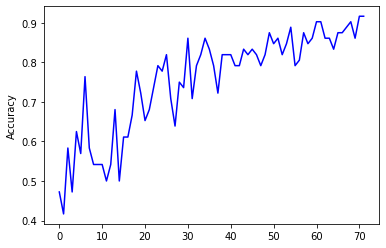

In [88]:
import matplotlib.pyplot as plt

plt.ylabel('Accuracy')
plt.plot(results.history['accuracy'], color = 'blue', label='Training Accuracy')

In [89]:
model.save("/content/drive/My Drive/alzheimer_classification/best_model.h5" )

In [90]:
from tensorflow.keras.models import load_model

In [91]:
model = load_model("/content/drive/My Drive/alzheimer_classification/best_model.h5")

In [92]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 238, 238, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 119, 119, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 117, 117, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 58, 58, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 64)       

In [97]:
model.evaluate(test_image_gen)

2/2 [==============================] - 1s 10ms/step - loss: 0.3260 - accuracy: 0.8485


[0.32595232129096985, 0.8484848737716675]

In [98]:
model.metrics_names

['loss', 'accuracy']

In [99]:
preds = model.predict_generator(test_image_gen, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


2/2 [==============================] - 1s 22ms/step


In [100]:
predictions = preds > 0.5
predictions

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True]])

In [101]:
from sklearn.metrics import classification_report, confusion_matrix

In [102]:
y_true = test_image_gen.classes

In [103]:
print(classification_report(y_true, predictions))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.65      0.79        17

    accuracy                           0.82        33
   macro avg       0.86      0.82      0.81        33
weighted avg       0.87      0.82      0.81        33



Personal Images

In [119]:
para_cell

'/content/drive/My Drive/alzheimer_classification/training//healthy/healthy_07.jpg'

In [120]:
from tensorflow.keras.preprocessing import image

In [121]:
my_image = image.load_img(para_cell,
               target_size = (240, 240))

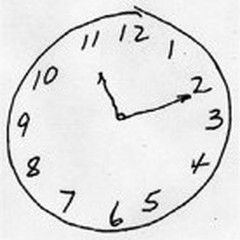

In [122]:
my_image

In [123]:
my_image_array = image.img_to_array(my_image)

In [124]:
my_image_array.shape # We want (1, 130, 130, 3)

(240, 240, 3)

In [125]:
my_image_array = np.expand_dims(my_image_array, axis = 0)

In [126]:
my_image_array.shape

(1, 240, 240, 3)

In [127]:
if(model.predict(my_image_array)[0][0] > 0.5):
  print("Unhealthy")
else:
  print("healthy")

healthy
